In [727]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn. preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit


In [728]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [729]:
df.groupby('area_type')['area_type'].count()


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [730]:
df2 = df.drop(['society','availability','balcony','area_type'],axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


DATA CLEANING

In [731]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [732]:

df3 = df2.dropna()#dropuje wiersze w ktorych nie ma wartosci   df['bath'] = df['bath'].fillna(mediano)
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [733]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [734]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

df3.head()

C:\Users\adria\AppData\Local\Temp\ipykernel_25212\1144535215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [735]:
df3.BHK.unique()
df3[df3.BHK>20]
# df3.drop('BHK')

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [736]:
df3.total_sqft.unique() # trzeba usunac ten range

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [737]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [738]:
df3[~df3['total_sqft'].apply(is_float)].head()# jesli nie udalo sie negacja ~, to wyswietl je


,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [739]:
def range_split(x):
    tokens = x.split(' - ')
    if len(tokens) == 2:
        avg = (float(tokens[0]) + float(tokens[1]))/2
        return avg
    try:
        return(float(x))
    except:
        return None

In [740]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(range_split)
df4['total_sqft'].unique()
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [741]:
df5 = df4.copy()
df5['total_m2'] = df5.total_sqft*0.0929
df5 =df5.drop('total_sqft',axis = 1)
df5['price_per_m2'] = (df5.price *10000/df5['total_m2']).round(2)
df5.head()

,location,size,bath,price,BHK,total_m2,price_per_m2
0,Electronic City Phase II,2 BHK,2.0,39.07,2,98.1024,3982.57
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,241.5400,4968.12
2,Uttarahalli,3 BHK,2.0,62.00,3,133.7760,4634.61
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,141.3009,6723.24
4,Kothanur,2 BHK,2.0,51.00,2,111.4800,4574.81


In [742]:
len(df5.location.unique())

1304

In [743]:
location_stat = df5.groupby('location')['location'].count().sort_values(ascending=False)

In [744]:
less_than_10 = location_stat[location_stat<10]
less_than_10

location
Kamakshipalya            9
Kaverappa Layout         9
Yemlur                   9
Sector 1 HSR Layout      9
4th Block Koramangala    9
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1051, dtype: int64

In [745]:
df5. location = df5.location.apply(lambda x: 'other' if x in less_than_10 else x)
len(df5.location.unique())


254

In [746]:
df5.head(5)

,location,size,bath,price,BHK,total_m2,price_per_m2
0,Electronic City Phase II,2 BHK,2.0,39.07,2,98.1024,3982.57
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,241.5400,4968.12
2,Uttarahalli,3 BHK,2.0,62.00,3,133.7760,4634.61
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,141.3009,6723.24
4,Kothanur,2 BHK,2.0,51.00,2,111.4800,4574.81


OUTLIERS

In [747]:
df6 = df5[(df5.total_m2/df5.BHK)>25]
df6.shape

(12532, 7)

In [748]:
df6.price_per_m2.describe()

count     12532.000000
mean       6811.954026
std        4512.503515
min         288.300000
25%        4532.320000
50%        5703.880000
75%        7473.735000
max      189957.580000
Name: price_per_m2, dtype: float64

In [749]:
#delete outliners
def remove_outliners(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):#po zmianie location funkcja jest bardiej uniwersalne
        m = np.mean(subdf.price_per_m2)
        std = np.std(subdf.price_per_m2)
        reduced_df = subdf[(subdf.price_per_m2 >(m-std)) & (subdf.price_per_m2 <(m+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [750]:
df7 = remove_outliners(df6)
df7.shape

(10323, 7)

In [751]:
df6.shape

(12532, 7)

In [752]:
df7 = df7

(0.0, 1000.0)

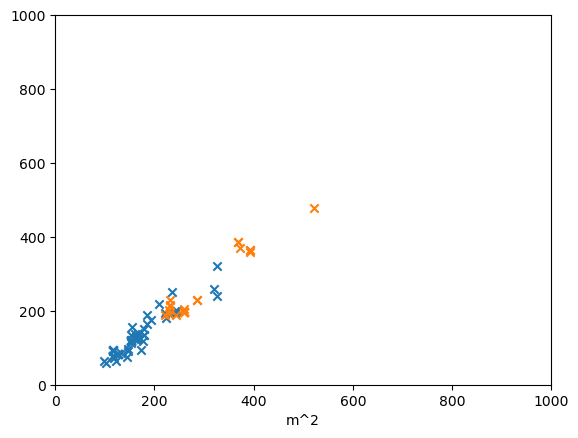

In [753]:
bhk3 = df7[(df7.BHK==3) & (df7.location == 'Hebbal')]
bhk4 = df7[(df7.BHK==4) & (df7.location =='Hebbal')]

plt.scatter(bhk3.total_m2,bhk3.price,marker='x')
plt.scatter(bhk4.total_m2,bhk4.price,marker='x')
plt.xlim(0,1000)
plt.xlabel('m^2')
plt.ylim(0,1000)


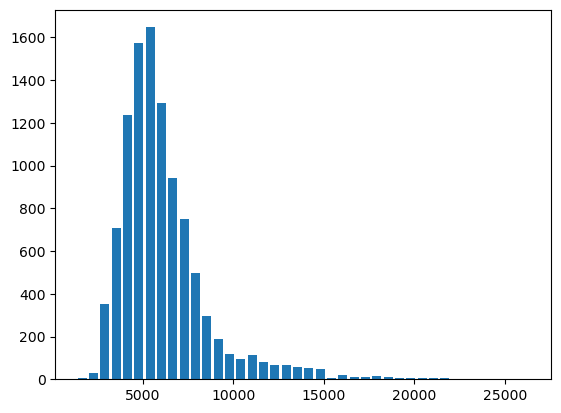

In [754]:
plt.hist(df7.price_per_m2, bins = 40, rwidth=0.8)
plt.show()

In [755]:
df7.bath.unique()
df7 = df7[df7.bath<7.0] 
# df7.location.unique()

df7.head(20)


,location,size,bath,price,BHK,total_m2,price_per_m2
0,Devarachikkanahalli,3 BHK,2.0,44.0,3,116.1250,3789.02
1,Devarachikkanahalli,2 BHK,2.0,40.0,2,116.1250,3444.56
2,Devarachikkanahalli,2 Bedroom,2.0,83.0,2,111.4800,7445.28
3,Devarachikkanahalli,2 BHK,2.0,40.0,2,108.6930,3680.09
4,Devarachikkanahalli,3 BHK,2.0,65.0,3,132.3825,4910.01
5,Devarachikkanahalli,2 BHK,2.0,43.0,2,87.9763,4887.68
6,Devarachikkanahalli,2 BHK,2.0,36.0,2,104.9770,3429.32
7,Devarachikkanahalli,3 BHK,2.0,76.0,3,131.6393,5773.35
8,Devarachikkanahalli,2 BHK,2.0,58.0,2,114.2670,5075.83
9,Devarachikkanahalli,3 BHK,3.0,75.0,3,158.3945,4735.01


In [756]:
df8 = df7.drop(['size','price_per_m2'],axis = 1)
df8['price'] = df7['price']*10000
df8.head(20)

,location,bath,price,BHK,total_m2
0,Devarachikkanahalli,2.0,440000.0,3,116.1250
1,Devarachikkanahalli,2.0,400000.0,2,116.1250
2,Devarachikkanahalli,2.0,830000.0,2,111.4800
3,Devarachikkanahalli,2.0,400000.0,2,108.6930
4,Devarachikkanahalli,2.0,650000.0,3,132.3825
5,Devarachikkanahalli,2.0,430000.0,2,87.9763
6,Devarachikkanahalli,2.0,360000.0,2,104.9770
7,Devarachikkanahalli,2.0,760000.0,3,131.6393
8,Devarachikkanahalli,2.0,580000.0,2,114.2670
9,Devarachikkanahalli,3.0,750000.0,3,158.3945


Budowanie modelu

In [757]:
#uzyje hot ending bo label encoding bardziej do danych ktore skacza typu podstawowk, gimnazjum, liceum, studia
# encoder = LabelEncoder()

# X['location'] = encoder.fit_transform(X['location'])
X
dummies = pd.get_dummies(df8.location,dtype=int)
dummies


,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [758]:
df9 = pd.concat([df8,dummies],axis  ='columns')
df9 = df9.drop('location',axis = 1)
df9.head()

,bath,price,BHK,total_m2,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,440000.0,3,116.1250,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,400000.0,2,116.1250,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,830000.0,2,111.4800,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,400000.0,2,108.6930,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,650000.0,3,132.3825,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [759]:
X = df9.drop('price',axis = 1)
Y = df9['price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2)
model_lin = Lasso()
model_lin.fit(X_train, Y_train)
model_lin.score(X_test, Y_test)


c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+13, tolerance: 5.706e+11
  model = cd_fast.enet_coordinate_descent(


0.8445144924960435

In [760]:
# cv =ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
# cross_val_score(Lasso(),X,Y, cv =cv).mean()

HYPER PARAMETER TUNING

In [770]:
def find_best_model(X,Y):
    algos = { 'LinearRegression' :{
        'model':LinearRegression(),
        
        'params': {
            'fit_intercept': [True, False]
        }
    },


'lasso' :{
        'model':Lasso(),
        'params': {
            'alpha':[1,2],
            'selection':['random', 'cyclic']
        }

    },

'decision_tree' :{
        'model':DecisionTreeRegressor(),
        'params': {
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
        }

    }
    }

    scores = []
    cv = ShuffleSplit(n_splits =5,test_size=0.2, random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params': gs.best_params_

        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [771]:
find_best_model(X,Y)


c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.429e+14, tolerance: 6.039e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.888e+14, tolerance: 6.132e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

,model,best_score,best_params
0,LinearRegression,0.812102,{'fit_intercept': False}
1,lasso,0.812125,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.711366,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
